In [1]:
!mkdir -p /root/.kaggle

In [2]:
import shutil
shutil.move('kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0
 99% 1.96G/1.98G [00:12<00:00, 39.8MB/s]
100% 1.98G/1.98G [00:12<00:00, 170MB/s] 


In [5]:
!unzip /content/emotion-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Sad/0a12a7e998fa7abde73e79ce2a74477bdc6f5dd010da05231f4c3330.jpg  
  inflating: dataset/Sad/0a1370fc7e34586d5f134694c9d1e79ed4cce9e59684077ae5061db8.png  
  inflating: dataset/Sad/0a14abb2a25753914205e88e870054918de36219552002f3144b8455.jpg  
  inflating: dataset/Sad/0a15eede4e05e13f70f6540c4167282f9a488cc318005c8693c49433.jpg  
  inflating: dataset/Sad/0a163aa46984ad37b58aa6b8175dca9b1007a3066099d18f4dda6f78.jpg  
  inflating: dataset/Sad/0a1833eb2427bd8c1ddd3b9c020c6233a3671763e21b1e08b5afa41f.jpg  
  inflating: dataset/Sad/0a19842e87935fbd2c45a7042e4bb8d1d3816476e8a6b7e8f41205d8.jpg  
  inflating: dataset/Sad/0a1d613237e9af295213c61e1c2b9d7fd211fad638c522afb9548901.jpg  
  inflating: dataset/Sad/0a1d86074a08f9bf55858cf90eaaee6f1e0362d97f08cbaa161e30e0.jpg  
  inflating: dataset/Sad/0a22b8d3b2fbcbebb6a4be7dad0a37b92983e8afe42b4d48cded4e45.jpg  
  inflating: dataset/Sad/0a285a2a07f0f8daaa0a821e30ad2e558ddc18f2589a

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

In [7]:
data_path = '/content/dataset'
img_size=(224,224)

train_data = tf.keras.utils.image_dataset_from_directory(
    data_path,
    subset='training',
    validation_split=0.2,
    seed=42,
    image_size=img_size,
    batch_size=32,
    label_mode='categorical'

)


validation_data = tf.keras.utils.image_dataset_from_directory(
    data_path,
    subset='validation',
    validation_split=0.2,
    seed=42,
    image_size=img_size,
    batch_size=32,
    label_mode='categorical'

)

Found 15453 files belonging to 6 classes.
Using 12363 files for training.
Found 15453 files belonging to 6 classes.
Using 3090 files for validation.


In [8]:
class_names=train_data.class_names
class_names

['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [9]:
len(class_names)

6

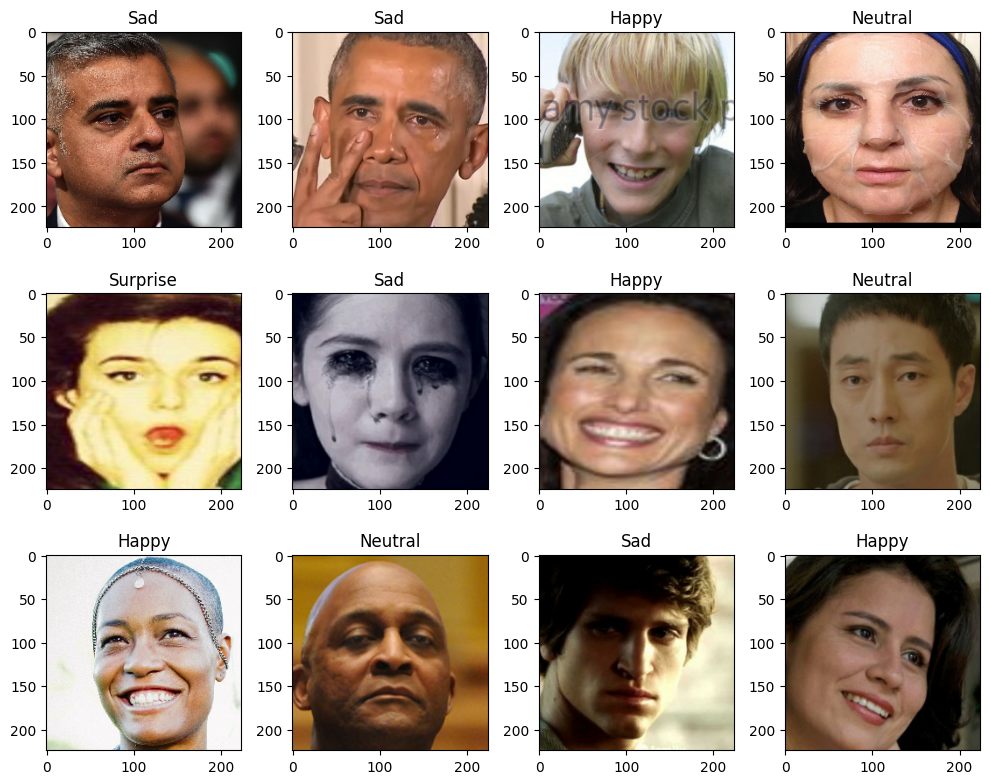

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
for image,label in train_data.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    # Convert the image tensor to a NumPy array and then to uint8 for plotting
    plt.imshow(image[i].numpy().astype('uint8'))
    # Use argmax on the label tensor to get the index of the predicted class
    plt.title(class_names[label[i].numpy().argmax()])
plt.tight_layout()
plt.show()

In [11]:
import numpy as np
import pathlib

data_dir = pathlib.Path(data_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Ahegao' 'Angry' 'Happy' 'Neutral' 'Sad' 'Surprise']


In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class  # 'pizza_steak/test/pizza'
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (498, 345, 3)


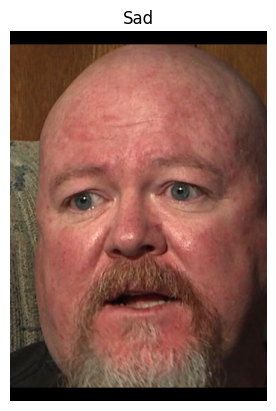

In [13]:
img = view_random_image(target_dir='dataset/',
                        target_class = 'Sad')

Image shape: (123, 67, 3)


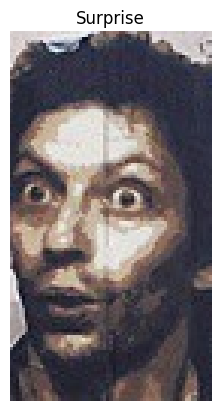

In [14]:
img = view_random_image(target_dir='dataset/',
                        target_class = 'Surprise')

In [ ]:
# import shutil

# shutil.rmtree('/content/dataset/Ahegao')

Image shape: (373, 373, 3)


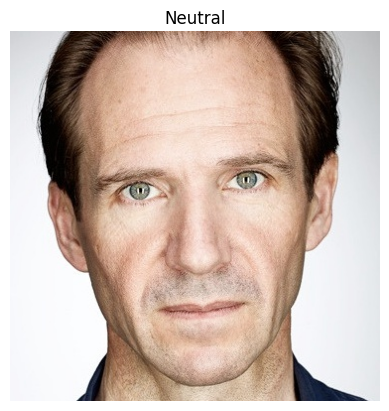

In [15]:
img = view_random_image(target_dir='dataset/',
                        target_class = 'Neutral')

Image shape: (177, 120, 3)


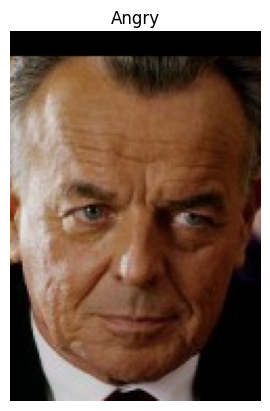

In [16]:
img = view_random_image(target_dir='dataset/',
                        target_class = 'Angry')

Image shape: (40, 27, 3)


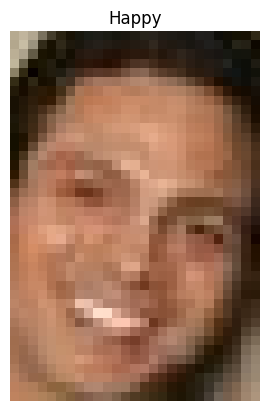

In [17]:
img = view_random_image(target_dir='dataset/',
                        target_class = 'Happy')

In [18]:
img/255

array([[[2.7989235e-03, 2.6143792e-03, 2.2145330e-03],
        [2.9680892e-03, 2.7835448e-03, 2.4144561e-03],
        [2.7220300e-03, 2.5528644e-03, 2.2145330e-03],
        ...,
        [3.2295272e-04, 2.7681663e-04, 4.6136101e-05],
        [3.5371011e-04, 2.6143793e-04, 4.6136101e-05],
        [7.2279893e-04, 6.1514805e-04, 3.3833142e-04]],

       [[2.7527874e-03, 2.5682431e-03, 2.1683970e-03],
        [3.0603614e-03, 2.9065744e-03, 2.5221070e-03],
        [2.3836987e-03, 2.2606691e-03, 1.9377163e-03],
        ...,
        [5.8439065e-04, 5.5363326e-04, 3.6908881e-04],
        [5.5363326e-04, 4.9211847e-04, 3.2295272e-04],
        [1.9992310e-04, 1.0765091e-04, 0.0000000e+00]],

       [[2.8758170e-03, 2.6912726e-03, 2.2914265e-03],
        [2.6605153e-03, 2.4913496e-03, 2.1530183e-03],
        [1.5224913e-03, 1.3994618e-03, 1.0765091e-03],
        ...,
        [2.9219533e-04, 3.0757402e-04, 1.8454441e-04],
        [3.0757402e-04, 3.0757402e-04, 1.8454441e-04],
        [2.9219533e-04

In [19]:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=10,
            kernel_size=3,
            activation='relu',kernel_initializer='he_normal',
            kernel_regularizer= regularizers.l2(0.01),
            input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
        tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(len(class_names),activation='softmax')

    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model_1 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=10,
#                            kernel_size=3,
#                            activation='relu',
#                            input_shape=(224,224,3)),
#     tf.keras.layers.Conv2D(10,3,activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2,
#                               padding='valid'),
#     tf.keras.layers.Conv2D(10,3,activation='relu'),
#     tf.keras.layers.Conv2D(10,3,activation='relu'),
#     tf.keras.layers.MaxPool2D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1,activation='sigmoid')
# ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','f1_score'])

In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         2,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 359552)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    46,022,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,127,742 (175.96 MB)

 Trainable params: 46,127,358 (175.96 MB)

 Non-trainable params: 384 (1.50 KB)

In [22]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch = len(train_data),
    validation_data=validation_data,
    validation_steps= len(validation_data)
)

Epoch 1/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 75s 159ms/step - accuracy: 0.3905 - loss: 1.7033 - val_accuracy: 0.3977 - val_loss: 1.7205
Epoch 2/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 60s 130ms/step - accuracy: 0.6325 - loss: 1.0208 - val_accuracy: 0.6023 - val_loss: 1.1723
Epoch 3/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 51s 130ms/step - accuracy: 0.7988 - loss: 0.6275 - val_accuracy: 0.5793 - val_loss: 1.3449
Epoch 4/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 81s 128ms/step - accuracy: 0.9188 - loss: 0.3271 - val_accuracy: 0.5476 - val_loss: 1.7750
Epoch 5/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 84s 133ms/step - accuracy: 0.9656 - loss: 0.1862 - val_accuracy: 0.6016 - val_loss: 1.5514


In [ ]:
#     base_model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights='imagenet',
#     classifier_activation='softmax',

inputs = tf.keras.layers.Input(shape=(224,224,3))
x= tf.keras.applications.resnet50.preprocess_input(inputs)
base_model = tf.keras.applications.ResNet50(include_top=False,input_tensor=x)

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output= tf.keras.layers.Dense(len(class_names),activation='softmax')(avg)
model= tf.keras.Model(inputs,output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
def pred_and_plot(model,image_path):
  img= mpimg.imread(image_path)
  img= tf.image.resize(img,size=[224,224])
  img= img[tf.newaxis,...]
  pred=model.predict(img)

  plt.figure(figsize=(12,8))
  plt.subplot(1,2,1)
  plt.imshow(img[0]/255)
  plt.title(f"Prediction: {class_names[np.argmax(pred)]}")
  plt.axis(False)
  plt.subplot

In [ ]:
base_model.trainable=False

In [ ]:
initial_learning_rate=0.01
lr_schedule= tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=357,
    decay_rate= 0.96
)
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'emotion_detector.keras',
    save_best_only= True
)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(lr_schedule),
              metrics=["accuracy","f1_score"])

In [ ]:
history=  model.fit(train_data,validation_data=validation_data, epochs=30,callbacks=[early_stopping,checkpoint_cb])

In [ ]:
history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=validation_data,
                      validation_steps=len(validation_data))